# Testowanie wpływu  losowego wyboru popytu podczas tworzenia  populacji na skuteczność algorytmu

W ramach tego testu sprawdzono wpływ parametru ```random_demand_rate``` na skuteczność algorytmu genetycznego. W ramach testu dla dwóch zestawów parametrów z różniącym się parametrem ```random_demand_rate``` uruchomoiono algorytm 15 razy a następnie porównano wyniki.

In [1]:
import os
import sys
import json
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from project_app.app_settings import orchard
import matplotlib.pyplot as plt

# Dwa zestawy parametrów
algorithm_settings = {
    "set3-rdr-false":{
           "max_iter_no_progress": 400,
           "max_iter": 3000,
           "replacement_rate": 0.7,
           "mutation_proba": 0.4,
           "random_demand_rate": False,
           "verbose": False},
    
    "set3-rdr-true":{
           "max_iter_no_progress": 400,
           "max_iter": 3000,
           "replacement_rate": 0.7,
           "mutation_proba": 0.4,
           "random_demand_rate": True,
           "verbose": False}
}

In [2]:
# Słownik different_results służy do przechowywania
# wyników poszczególnych eksperymentów dla różnych 
# zestawów parametrów.
different_results = dict()

for key, settings in algorithm_settings.items():
    # Pętla po poszczególnych zestawach parametrów

    results = []
    inp = settings["max_iter_no_progress"]
    mi = settings["max_iter"]
    rr = settings["replacement_rate"]
    mp = settings["mutation_proba"]
    v = settings["verbose"]
    rdr = settings["random_demand_rate"]
    for i in range(15):
        # 15 krotne uruchomienie algorytmu z tymi samymi ustawieniami
        # oraz zapisanie każdego wyniku do listy results 
        print(key, i)
        _, profit, iterations = orchard.genetic_algorithm(max_iter_no_progress=inp, max_iter=mi,
                                            replacement_rate=rr, mutation_proba=mp, verbose=v, random_demand_rate=rdr)
        results.append((profit, iterations)
    
    # Przypisanie wyników ekperymentu do 
    # odpowiedniego zestawu parametrów
    different_results[key] = results

set3-rdr-false 0
set3-rdr-false 1
set3-rdr-false 2
set3-rdr-false 3
set3-rdr-false 4
set3-rdr-false 5
set3-rdr-false 6
set3-rdr-false 7
set3-rdr-false 8
set3-rdr-false 9
set3-rdr-false 10
set3-rdr-false 11
set3-rdr-false 12
set3-rdr-false 13
set3-rdr-false 14
set3-rdr-true 0
set3-rdr-true 1
set3-rdr-true 2
set3-rdr-true 3
set3-rdr-true 4
set3-rdr-true 5
set3-rdr-true 6
set3-rdr-true 7
set3-rdr-true 8
set3-rdr-true 9
set3-rdr-true 10
set3-rdr-true 11
set3-rdr-true 12
set3-rdr-true 13
set3-rdr-true 14



Wyniki dla zestawu ustawień z set3-rdr-false
Zysk: 6064.800000000002 | Iteracje: 1776
Zysk: 6028.300000000003 | Iteracje: 2380
Zysk: 6831.600000000002 | Iteracje: 3001
Zysk: 6077.000000000004 | Iteracje: 2188
Zysk: 6828.200000000002 | Iteracje: 1770
Zysk: 6030.700000000002 | Iteracje: 1790
Zysk: 6068.600000000002 | Iteracje: 1753
Zysk: 6081.200000000002 | Iteracje: 2539
Zysk: 6110.200000000004 | Iteracje: 2675
Zysk: 6092.9000000000015 | Iteracje: 1900
Zysk: 6043.000000000002 | Iteracje: 2573
Zysk: 6003.100000000002 | Iteracje: 1638
Zysk: 6079.700000000002 | Iteracje: 2247
Zysk: 6057.200000000001 | Iteracje: 1297
Zysk: 6005.500000000002 | Iteracje: 1838
Średni zysk: 6160.133333333335
Mediana zysku: 6068.600000000002



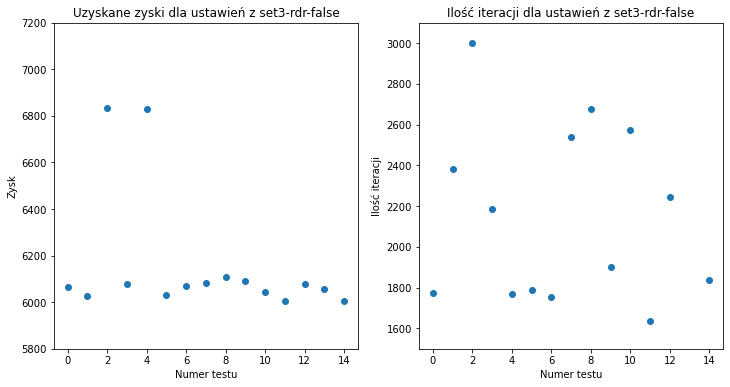


Wyniki dla zestawu ustawień z set3-rdr-true
Zysk: 6044.9000000000015 | Iteracje: 1601
Zysk: 6003.800000000001 | Iteracje: 2174
Zysk: 6016.700000000002 | Iteracje: 1631
Zysk: 6097.700000000001 | Iteracje: 2627
Zysk: 6014.9000000000015 | Iteracje: 1939
Zysk: 6077.600000000002 | Iteracje: 1695
Zysk: 6729.299999999999 | Iteracje: 2059
Zysk: 6129.700000000001 | Iteracje: 2208
Zysk: 6072.300000000002 | Iteracje: 2315
Zysk: 6144.800000000001 | Iteracje: 1986
Zysk: 6062.000000000002 | Iteracje: 2082
Zysk: 6232.500000000001 | Iteracje: 2148
Zysk: 6009.4000000000015 | Iteracje: 1822
Zysk: 6155.0 | Iteracje: 1668
Zysk: 6089.800000000002 | Iteracje: 2303
Średni zysk: 6125.360000000001
Mediana zysku: 6077.600000000002



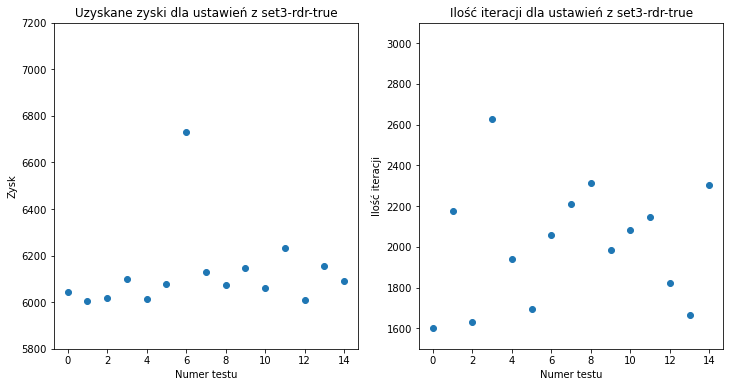

In [7]:
# Słownik test_results służy do zapisania wyników
# eksperymentu do pliku JSON
test_results = {}

for key, results in different_results.items():
    # Pętla po poszczególnych zestawach parametrów
    # wraz z ich wynikami eksperymentów.
    
    test_results[key] = {"zyski":{},
                         "iteracje":{}}
    fg, ax = plt.subplots(1,2,figsize=(12,6))
    profits = [] # lista do zapisu zysków dla danego zestawu parametrów
    iterations = [] # lista do zapisu ilości iteracji dla danego zestawu parametrów
    txt = f"\nWyniki dla zestawu ustawień z {key}\n"
    for i, el in enumerate(results):
        # Pętla po poszczególnych wynikach
        # dla danego zestawu parametrów.
        profits.append(el[0])
        iterations.append(el[1])
        test_results[key]["zyski"][i] = el[0]
        test_results[key]["iteracje"][i] =  el[1]
        txt += f"Zysk: {el[0]} | Iteracje: {el[1]}\n"
        
    average_profit = np.average(np.array(profits))
    median_profit = np.median(np.array(profits))
    txt += f"Średni zysk: {average_profit}\n"
    txt += f"Mediana zysku: {median_profit}\n"
    test_results[key]["sredni_zysk"] = average_profit
    test_results[key]["mediana_zysku"] = median_profit
    print(txt)

    ax[0].scatter([i for i in range(len(results))], profits)
    ax[0].set_title(f"Uzyskane zyski dla ustawień z {key}")
    ax[0].set_xlabel("Numer testu")
    ax[0].set_ylabel("Zysk")
    ax[0].set_ylim([5800, 7200])

    ax[1].scatter([i for i in range(len(results))], iterations)
    ax[1].set_title(f"Ilość iteracji dla ustawień z {key}")
    ax[1].set_xlabel("Numer testu")
    ax[1].set_ylabel("Ilość iteracji")
    ax[1].set_ylim([1500, 3100])
    plt.show()
    
with open('wyniki/testy_random_demand_rate.json', 'w') as outfile:
    json.dump(test_results, outfile)

In [ ]:
# Kod do wczytania zapisanych wyników testów
different_results = {}
with open('wyniki/testy_random_demand_rate.json', 'r') as f:
    data = json.load(f)
    different_results["set3-rdr-false"] = [el for el in zip(list(data["set3-rdr-false"]["zyski"].values()),
                                                 list(data["set3-rdr-false"]["iteracje"].values()))]
    different_results["set3-rdr-true"] = [el for el in zip(list(data["set3-rdr-true"]["zyski"].values()),
                                                 list(data["set3-rdr-true"]["iteracje"].values()))]